## Exercise 2 of linear regression
**2. Assume that you are Georg Simon Ohm trying to come up with a model between voltage and current. Can you use auto differentiation to learn the parameters of your model?**

Relation between current and voltage 

V = IR

1. V=IR daguu dataset uusgene
2. dataset ees V, I hoyriin hamaaral ymar bolohiig shugaman regress eer gargana. 
R = const, w = [1], b=0 -- anhnii utguud 
w = [1], b = 0 gedgiig taah ystoi 

V=wIR + b + noise

dependent = I and R 
independent = V

## Sample dataset
I-vector, V-vector

In [12]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import npx, np, autograd
import random
npx.set_np()


Resistance = 2
num_examples = 1000
true_w = np.array([1])
true_b = np.zeros(1)
true_w, true_b

(array([1.]), array([0.]))

## Creating the dataset

In [14]:
def synthetic_data(w,b, num_examples):
    """generate y=xw+b+e"""
    X = np.random.normal(0,1, (num_examples, len(w)))
    y = np.dot(X,w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [15]:
features, labels = synthetic_data(true_w, true_b, 1000)


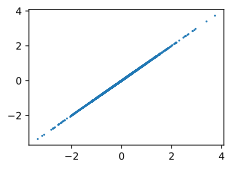

In [17]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features), d2l.numpy(labels), 1);

## Reading dataset

In [4]:
def data_iter(features, labels, batch_size):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i:min(batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        

In [5]:
batch_size = 10
for V,I in data_iter(features, labels, batch_size):
    print(V, '\n', I)
    break

[[-2.5074806 ]
 [ 0.47898   ]
 [ 0.22842792]
 [ 0.12791033]
 [ 0.11693194]
 [ 1.1450645 ]
 [-0.43897742]
 [ 0.8262927 ]
 [ 1.198976  ]
 [ 0.5174201 ]] 
 [[-2.512738  ]
 [ 0.47976014]
 [ 0.22205451]
 [ 0.1306472 ]
 [ 0.10960655]
 [ 1.1357194 ]
 [-0.44196093]
 [ 0.8313047 ]
 [ 1.2051157 ]
 [ 0.5153936 ]]


## Preparing linear regression necessary functions
1. linreg -- for get prediction
2. squared_loss -- for get loss on single example
3. sgd -- for stochastic gradient descent
4. 

In [6]:
w= np.random.normal(0, 0.01, (1,1))
b = np.ones(1)
w.attach_grad()
b.attach_grad()
w[0], b[0]

(array([-0.00618744]), array(1.))

In [7]:
def linreg(I,w,b):
    return np.dot(I,w)+b
    

In [8]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [9]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr*param.grad/batch_size

## Training

Algorithm:

Initialize parameters: w,b

Repeat until done

    Compute gradient

    Update parameters

In [10]:
lr = 0.3
num_epochs = 3
net = linreg
loss=squared_loss
for epoch in range(num_epochs):
    for V,I in data_iter(features, labels, batch_size):
        with autograd.record():
            l = loss(net(I,w,b), V)
        l.backward()
        sgd([w,b], lr, batch_size)
    train_l = loss(net(features,w,b), labels)
    print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 231.418304
epoch 2, loss 195413.515625
epoch 3, loss 162251520.000000


In [11]:
w,b

(array([[1318.9105]]), array([-17956.191]))